In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import my_finance_functions as mff
import plotly.graph_objects as go
import datetime
import mplfinance as mpf

%load_ext autoreload
%autoreload 2
#%matplotlib inline

print("Librarias OK!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Librarias OK!


In [4]:
GGAL = mff.import_data("GGAL.BA")
start_date = "2018-09"
end_date = "2019-07"
data = GGAL[start_date:end_date]

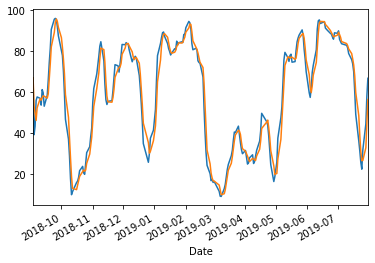

In [33]:
close = data['Close']
low = data['Low']
high = data['High']

K = mff.STOK(close, low, high, 14, slow = 6)
D = mff.STOD(K)

K.plot()
D.plot()

In [63]:
signals = pd.DataFrame(index = data.index)
#signals['signal1'] = 0.0
#signals['signal2'] = 0.0
signals['signal'] = 0.0

signals['K'] = K
signals['D'] = D

for date in signals.index:
    if signals.loc[date]['K'] > signals.loc[date]['D'] and signals.loc[date]['K'] < 30:
        signals.loc[date]['signal'] = 1.0
    else: signals.loc[date]['signal'] = 0.0



#signals['signal1'][3:] = np.where(signals['K'][3:]>signals['D'][3:], 1.0, 0.0)
#signals['signal2'][3:] = np.where(signals['K'][3:]<threshold[0][3:], 1.0, 0.0)
#signals['signal'][3:] = np.where(signals['signal1'][3:] == value[0][3:] and signals['signal2'][3:]==value[0][3:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

for date in signals.index:
    if signals.loc[date]['positions'] == -1.0:
        signals.loc[date]['positions'] = 0.0

signals.head(50)

,signal,K,D,positions
Date,,,,
2018-09-03,0.0,66.981151,66.981151,NaN
2018-09-04,0.0,39.142762,53.061957,0.0
2018-09-05,0.0,43.341543,49.821819,0.0
2018-09-06,0.0,55.864369,46.116225,0.0
2018-09-07,0.0,57.608157,52.271357,0.0
2018-09-10,0.0,56.935368,56.802631,0.0
2018-09-11,0.0,53.609145,56.050890,0.0
2018-09-12,0.0,61.199290,57.247934,0.0
2018-09-13,0.0,59.619753,58.142729,0.0


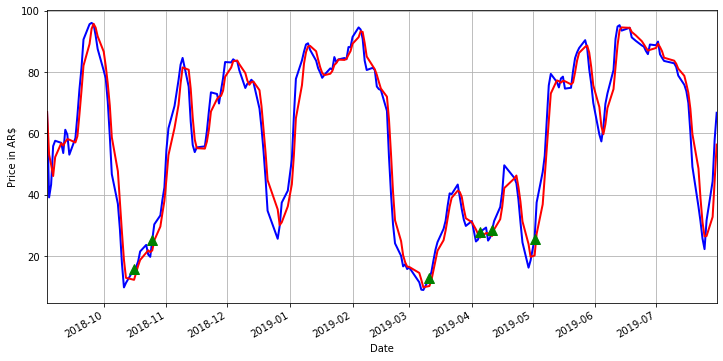

In [64]:
    # Initialize the plot figure
    fig = plt.figure(figsize = (12,6))

    # Add a subplot and label for y-axis
    ax1 = fig.add_subplot(111,  ylabel='Price in AR$')

    # Plot the closing price
    K.plot(ax=ax1, color='b', lw=2.)

    # Plot the short and long moving averages
    D.plot(ax=ax1, color='r', lw=2.)

    # Plot the buy signals
    ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.K[signals.positions == 1.0],
         '^', markersize=10, color='g')
         
    # Plot the sell signals
    ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.K[signals.positions == -1.0],
         'v', markersize=10, color='r')
    
    ax1.grid()

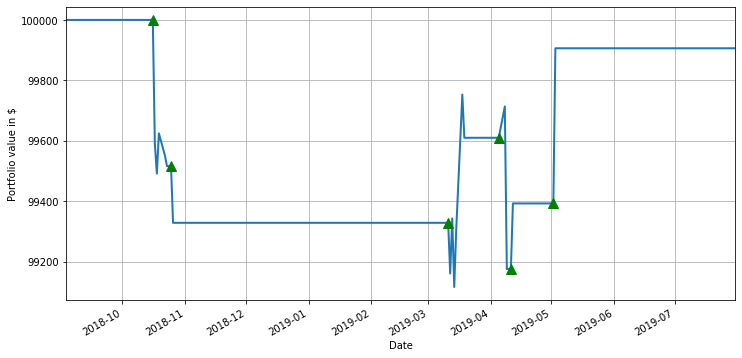

In [66]:
portf = mff.backtest(data, signals)
mff.plot_backtesting(portf, signals)